# Customer Segmentation Using RFM Analysis

This notebook analyzes eCommerce customer data using RFM (Recency, Frequency, Monetary) analysis and clustering to segment customers and guide marketing strategies.


### Import libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('data.csv', encoding='ISO-8859-1')
DF = pd.read_csv('data.csv', encoding='ISO-8859-1')

### Data loading and overview

In [4]:
data.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [5]:
#Data types of various columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
#Looking at the statistical charecterstics of numeric columns
data[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


### Data preprocessing

In [8]:
#Handelling missing values
#total number of missing values per column 
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
#percentage of missing values per column
data.isnull().mean()

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [10]:
#Dealing with missing customer id's and removing decimal point 
#removing decimal point and digits after that 
data['CustomerID_new']=data['CustomerID'].astype(str) 
data['CustomerID_new']=np.where(data['CustomerID_new'].isnull(),'Unavilable',data['CustomerID_new'].str[:-2])

In [11]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_new
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,17850


In [12]:
#replacing missing customer id's with 'unavailable'
data['CustomerID_new']=np.where(data['CustomerID_new']=='n','Unavilable',data['CustomerID_new'])
data['CustomerID']=data['CustomerID_new'] 
data.drop(['CustomerID_new'],axis=1,inplace=True)

In [13]:
#sample columns where customer if is unavailable
data[data['CustomerID']=='Unavilable']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,Unavilable,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,Unavilable,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,Unavilable,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,Unavilable,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,Unavilable,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,Unavilable,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,Unavilable,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,Unavilable,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,Unavilable,United Kingdom


In [14]:
#Dealing with outliers in quantity and unit price columns
#defining a function which gives us order status wrt order price and order quantity
def status_finder(quantity,price):
    if price<0 and quantity <0:
        return('Order cancelled and money given to customer')
    elif price==0 and quantity <0:
        return('Order cancelled and no money charged')
    elif price<0 and quantity >0:
        return('Bad Debt settled')
    elif price==0 and quantity>0: 
        return('Order given for free')
    elif price>0 and quantity<0: 
        return('Order cancelled')
    elif price>0 and quantity>0: 
        return('Order dispatched')
    else: 
        pass

In [15]:
data['Order_Status'] = data.apply(lambda row: status_finder(row['Quantity'], row['UnitPrice']), axis=1)

In [16]:
#different types of order status in our data
data['Order_Status'].value_counts()

Order_Status
Order dispatched                        530104
Order cancelled                           9288
Order cancelled and no money charged      1336
Order given for free                      1179
Bad Debt settled                             2
Name: count, dtype: int64

In [17]:
#Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [18]:
#extracting month name, year and time of the day from invoice date
data['Invoice_Month'] = data['InvoiceDate'].dt.strftime('%B')
data['Invoice_Year'] = data['InvoiceDate'].dt.year
data['Invoice_Time'] = data['InvoiceDate'].dt.strftime('%H:%M:%S')

In [19]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_Status,Invoice_Month,Invoice_Year,Invoice_Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Order dispatched,December,2010,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Order dispatched,December,2010,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Order dispatched,December,2010,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Order dispatched,December,2010,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Order dispatched,December,2010,08:26:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,Order dispatched,December,2010,08:26:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,Order dispatched,December,2010,08:26:00
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,Order dispatched,December,2010,08:28:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,Order dispatched,December,2010,08:28:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,Order dispatched,December,2010,08:34:00


### Feature engineering

In [20]:
#Adding a column Totalcost for Monetary by multiplying total quantity with unit price
data['TotalCost'] = data['Quantity'] * data['UnitPrice']
data['TotalCost']=data['TotalCost'].abs()

In [21]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_Status,Invoice_Month,Invoice_Year,Invoice_Time,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Order dispatched,December,2010,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Order dispatched,December,2010,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Order dispatched,December,2010,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Order dispatched,December,2010,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Order dispatched,December,2010,08:26:00,20.34


### RFM Calculation


In [22]:
#Recency Calculations
from datetime import datetime 
#taking todays date
latest_date = datetime(2023, 11, 29)

#grouping the data wrt latest date where order was generated by each customer
df_recency=data.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max() 
df_recency.columns = ['CustomerID', 'Latest_Date']

#calculating recency in days by subtracting the two dates
df_recency['Recency_in_days'] = (latest_date - df_recency['Latest_Date']).dt.days

In [23]:
df_recency.head()

,CustomerID,Latest_Date,Recency_in_days
0,12346,2011-01-18 10:17:00,4697
1,12347,2011-12-07 15:52:00,4374
2,12348,2011-09-25 13:13:00,4447
3,12349,2011-11-21 09:51:00,4390
4,12350,2011-02-02 16:01:00,4682


In [24]:
df_recency.drop(['Latest_Date'],axis=1,inplace=True)

In [25]:
#Frequency Calculations
#grouping data by number of invoices per customer
df_frequency=data.groupby(by='CustomerID', as_index=False)['InvoiceNo'].count() 

df_frequency.columns = ['CustomerID', 'Frequency']

In [26]:
df_frequency.head()

,CustomerID,Frequency
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17


In [27]:
#Monetory Calculations

#grouping data wrt total money spend by each customer
df_monetory=data.groupby(by='CustomerID', as_index=False)['TotalCost'].sum() 

df_monetory.columns = ['CustomerID', 'total_expense']

In [29]:
df_monetory.head()

,CustomerID,total_expense
0,12346,154367.20
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [32]:
print(df_monetory.shape)
print(df_frequency.shape)
print(df_recency.shape)

(4373, 2)
(4373, 2)
(4373, 2)


In [33]:
#merging the above 3 df using left join
merged_df = pd.merge(df_recency, df_monetory, on='CustomerID', how='left')
merged_df = pd.merge(merged_df, df_frequency, on='CustomerID', how='left')

In [34]:
merged_df.head(10)

,CustomerID,Recency_in_days,total_expense,Frequency
0,12346,4697,154367.20,2
1,12347,4374,4310.00,182
2,12348,4447,1797.24,31
3,12349,4390,1757.55,73
4,12350,4682,334.40,17
5,12352,4408,3466.67,95
6,12353,4576,89.00,4
7,12354,4604,1079.40,58
8,12355,4586,459.40,13
9,12356,4394,2811.43,59


In [35]:
merged_df.shape

(4373, 4)

### RFM Segmentation

In [36]:
#Providing a score from 1 to 4 for each RFM metric respectively as suggested
merged_df['Recency_Score'] = pd.qcut(merged_df['Recency_in_days'], 4, labels=[4, 3, 2, 1])
merged_df['Frequency_Score'] = pd.qcut(merged_df['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
merged_df['Monetary_Score'] = pd.qcut(merged_df['total_expense'], 4, labels=[1, 2, 3, 4])

In [37]:
merged_df.head(5)

,CustomerID,Recency_in_days,total_expense,Frequency,Recency_Score,Frequency_Score,Monetary_Score
0,12346,4697,154367.20,2,1,1,4
1,12347,4374,4310.00,182,4,4,4
2,12348,4447,1797.24,31,2,2,4
3,12349,4390,1757.55,73,3,3,4
4,12350,4682,334.40,17,1,1,2


In [38]:
#generating unified RMF score
merged_df['RFM_Score']=merged_df['Recency_Score'].astype(str)+merged_df['Frequency_Score'].astype(str) + merged_df['Monetary_Score'].astype(str)

In [39]:
merged_df.head()

,CustomerID,Recency_in_days,total_expense,Frequency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,12346,4697,154367.20,2,1,1,4,114
1,12347,4374,4310.00,182,4,4,4,444
2,12348,4447,1797.24,31,2,2,4,224
3,12349,4390,1757.55,73,3,3,4,334
4,12350,4682,334.40,17,1,1,2,112


In [40]:
#converting rfm score into integer
merged_df['RFM_Score']=merged_df['RFM_Score'].astype(int)

In [43]:
scored_df=merged_df[['CustomerID','Recency_Score','Frequency_Score','Monetary_Score','RFM_Score']]

In [44]:
scored_df.head()

,CustomerID,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,12346,1,1,4,114
1,12347,4,4,4,444
2,12348,2,2,4,224
3,12349,3,3,4,334
4,12350,1,1,2,112


### Customer segmentation

In [45]:
# Standardizing the data so that model can easily process them
df_rmf=scored_df[['Recency_Score','Frequency_Score','Monetary_Score']]
scaler = StandardScaler()
scaled_rfm_data = scaler.fit_transform(df_rmf)

# getting clusters based on 5 popular clustering methods (more detail in documentation)
# defining a function for getting the clusters basis each of these 5 techniques with default hyperparameters for now
def perform_clustering(method, data, n_clusters=None): 
    if method == 'kmeans':
        model = KMeans(n_clusters=n_clusters, random_state=42)
        labels = model.fit_predict(data) 
    elif method == 'hierarchical':
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        labels = model.fit_predict(data) 
    elif method == 'dbscan':
        model = DBSCAN(eps=0.5, min_samples=5)
        labels = model.fit_predict(data) 
    elif method == 'agglomerative':
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        labels = model.fit_predict(data) 
    elif method == 'gmm':
        model = GaussianMixture(n_components=n_clusters, random_state=42)
        labels = model.fit_predict(data) 
    else:
        raise ValueError("Invalid clustering method") 
    
    return labels

In [48]:
#calling the 5 functions and saving the output as a column in our dataframe
scored_df['KMeans_Segment'] = perform_clustering('kmeans', scaled_rfm_data, n_clusters=5)
scored_df['Hierarchical_Segment'] = perform_clustering('hierarchical', scaled_rfm_data, n_clusters=5)
scored_df['DBSCAN_Segment'] = perform_clustering('dbscan', scaled_rfm_data)
scored_df['Agglomerative_Segment'] = perform_clustering('agglomerative', scaled_rfm_data, n_clusters=5)
scored_df['GMM_Segment'] = perform_clustering('gmm', scaled_rfm_data, n_clusters=5)

In [49]:
scored_df.head()

,CustomerID,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,KMeans_Segment,Hierarchical_Segment,DBSCAN_Segment,Agglomerative_Segment,GMM_Segment
0,12346,1,1,4,114,0,0,0,0,2
1,12347,4,4,4,444,1,1,1,1,1
2,12348,2,2,4,224,4,0,2,0,3
3,12349,3,3,4,334,4,1,3,1,4
4,12350,1,1,2,112,2,0,4,0,2


In [50]:
data['Order_Status'].value_counts()

Order_Status
Order dispatched                        530104
Order cancelled                           9288
Order cancelled and no money charged      1336
Order given for free                      1179
Bad Debt settled                             2
Name: count, dtype: int64

In [51]:
#grouping the data basis number of orders generated by each customer
data['total_order']=np.where(data['Order_Status']=='Order dispatched',1,0) 
df_new=data.groupby(by='CustomerID', as_index=False)['total_order'].sum()

In [52]:
#left joining it with our original dataframe
scored_df = pd.merge(scored_df, df_new, on='CustomerID', how='left')

In [53]:
scored_df.head()

,CustomerID,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,KMeans_Segment,Hierarchical_Segment,DBSCAN_Segment,Agglomerative_Segment,GMM_Segment,total_order
0,12346,1,1,4,114,0,0,0,0,2,1
1,12347,4,4,4,444,1,1,1,1,1,182
2,12348,2,2,4,224,4,0,2,0,3,31
3,12349,3,3,4,334,4,1,3,1,4,73
4,12350,1,1,2,112,2,0,4,0,2,17


Understanding the relationship between the segments generated by the 5 clusturing algorithms and likelyhood of a customer ordering a product

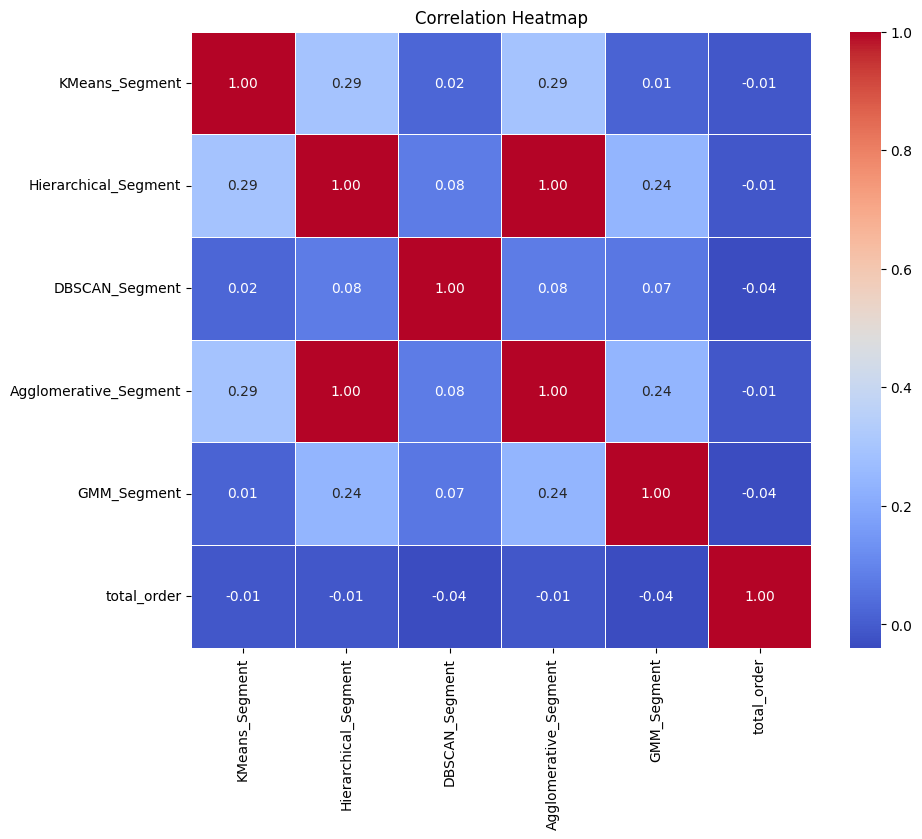

In [55]:
#correlation between total number of orders generated by each customer and the segments generated by the clusturing algorithms.
columns_to_correlate = ['KMeans_Segment', 'Hierarchical_Segment', 'DBSCAN_Segment', 'Agglomerative_Segment', 'GMM_Segment', 'total_order']
correlation_data = scored_df[columns_to_correlate]
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) 
plt.title('Correlation Heatmap') 
plt.show()

We observe that standard k means clusturing algorithm shows highest negative correlation, implying that the as the segment number increases the likelyhood of a customer generating an order decreases, which is exactly what we are looking for, hence we will be going ahead with a standard k means clusturing algorthm

In [67]:
final_segmented_df=scored_df[['CustomerID','Recency_Score','Frequency_Score','Monetary_Score','RFM_Score',
                             'KMeans_Segment','Hierarchical_Segment','DBSCAN_Segment','Agglomerative_Segment','GMM_Segment','total_order']]

### Segment Profiling

In [68]:
final_segmented_df['KMeans_Segment'].value_counts()

KMeans_Segment
4    1038
2     894
3     824
0     816
1     801
Name: count, dtype: int64

In [69]:
df_segment_profiling=pd.merge(final_segmented_df[['CustomerID','RFM_Score','KMeans_Segment','total_order']],merged_df)

In [70]:
df_segment_profiling.head(5)

,CustomerID,RFM_Score,KMeans_Segment,total_order,Recency_in_days,total_expense,Frequency,Recency_Score,Frequency_Score,Monetary_Score
0,12346,114,0,1,4697,154367.20,2,1,1,4
1,12347,444,1,182,4374,4310.00,182,4,4,4
2,12348,224,4,31,4447,1797.24,31,2,2,4
3,12349,334,4,73,4390,1757.55,73,3,3,4
4,12350,112,2,17,4682,334.40,17,1,1,2


In [71]:
all_segments=[0,1,2,3,4]

In [75]:
#printing the statistical characterstics like mean, std etc for rfm score,␣ ↪total number of order, number of days elapsed since last order
#, frequency of order and total money spend by customers belonging to each␣ ↪segment.
for i in all_segments:
    print('Describing the statistical characterestics of customers belonging to'+str(i)+' segment:') 
    print(df_segment_profiling[['RFM_Score','total_order','Recency_in_days','Frequency','total_expense']].describe())


Describing the statistical characterestics of customers belonging to0 segment:
         RFM_Score    total_order  Recency_in_days      Frequency  \
count  4373.000000    4373.000000      4373.000000    4373.000000   
mean    278.628173     121.222044      4463.560256     123.921564   
std     117.988227    2011.027024       100.770131    2054.469339   
min     111.000000       0.000000      4372.000000       1.000000   
25%     211.000000      17.000000      4388.000000      17.000000   
50%     311.000000      41.000000      4422.000000      42.000000   
75%     411.000000      99.000000      4515.000000     102.000000   
max     444.000000  132220.000000      4745.000000  135080.000000   

       total_expense  
count   4.373000e+03  
mean    2.649353e+03  
std     3.288365e+04  
min     0.000000e+00  
25%     3.085800e+02  
50%     6.780100e+02  
75%     1.698160e+03  
max     2.062871e+06  
Describing the statistical characterestics of customers belonging to1 segment:
         RFM_

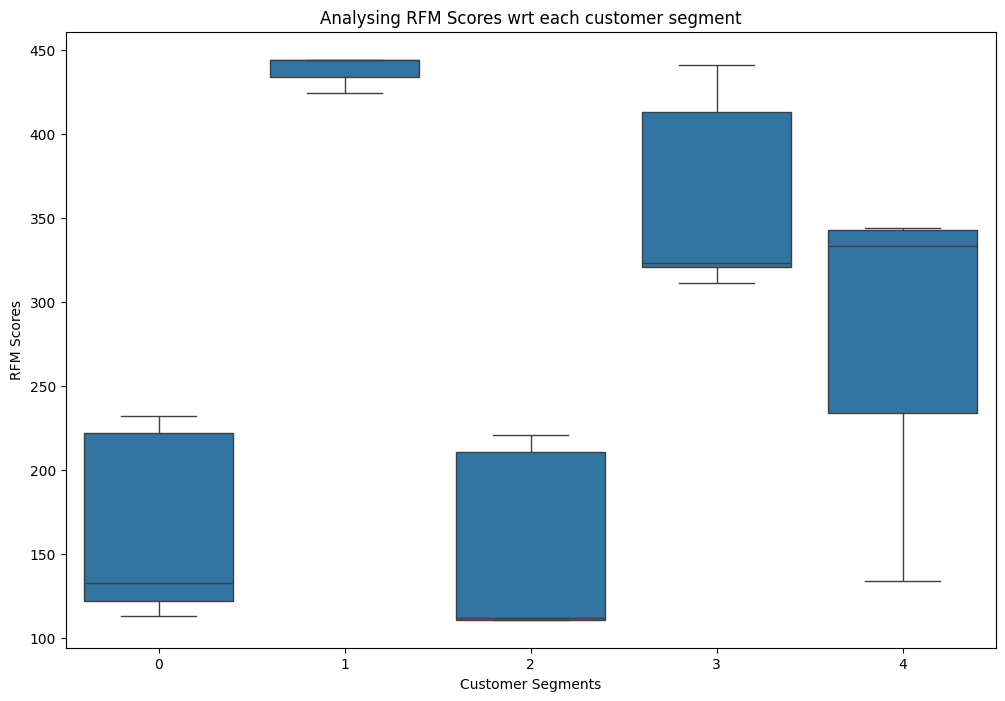

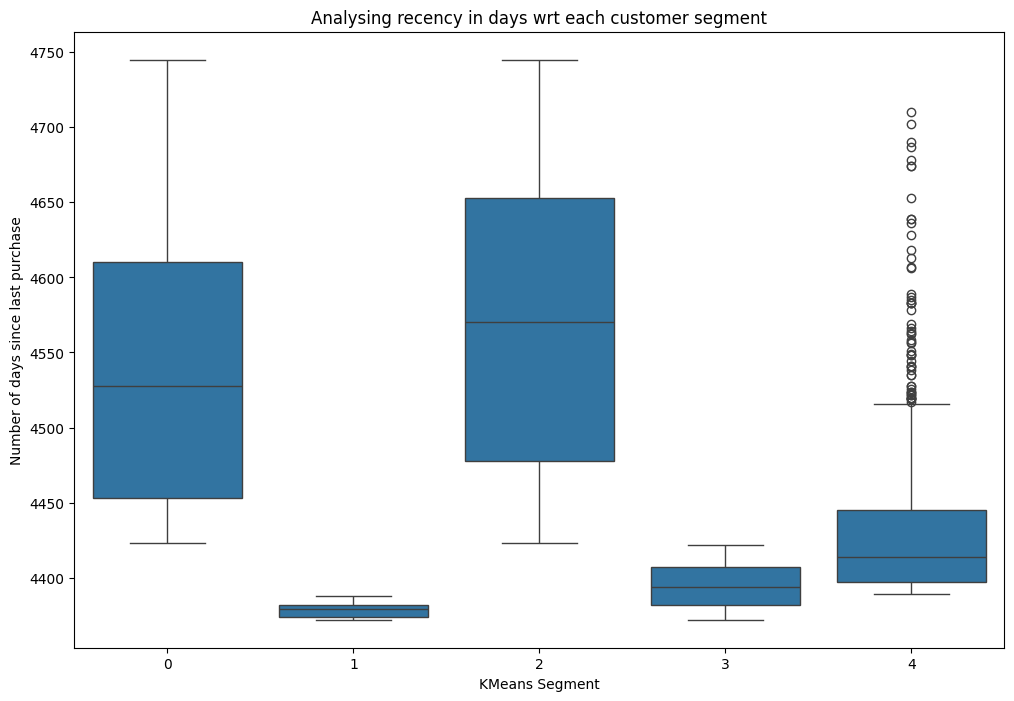

In [77]:
#Analysing RFM Score
plt.figure(figsize=(12, 8))
sns.boxplot(x='KMeans_Segment', y='RFM_Score', data=df_segment_profiling)
plt.title('Analysing RFM Scores wrt each customer segment')
plt.xlabel('Customer Segments')
plt.ylabel('RFM Scores')
plt.show()

#Analysing Recency in days
plt.figure(figsize=(12, 8))
sns.boxplot(x='KMeans_Segment', y='Recency_in_days', data=df_segment_profiling)
plt.title('Analysing recency in days wrt each customer segment')
plt.xlabel('KMeans Segment')
plt.ylabel('Number of days since last purchase')
plt.show()

Observations: 
1. Customers in the 0th segment are the best customers with the highest RFM scores. They perform very well in all metrics except recency, however they have an exceptionally high spending tendency, also, they were frequent buyers who have stopped purchasing due to some reason (will explore in next section)

2. Customers in the 1st segment are the weakest customers. Their average in all metrics is lowest except recency, indicating that they are part of the recent customer wave who isin’t spendig a lot.

3. Customers in 2nd and 3rd segment are the best customers in terms of ‘increasing sales’ due to their fairly decent performance accross all metrics. If suitable steps are taken, they could lead to massive increase in profits

4. Finally, we have 4th segment customers. They are a liability according to me due to them not performing exceptionally well in any metric and will not make or break the company revenue.
Marketing Recomendations

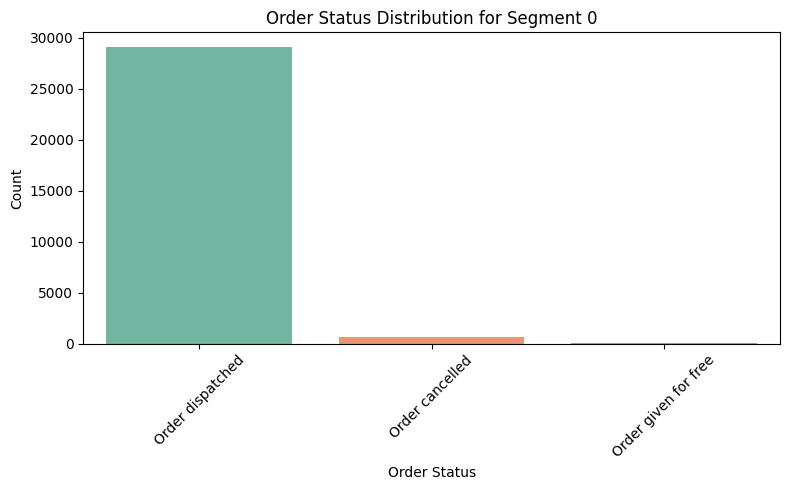

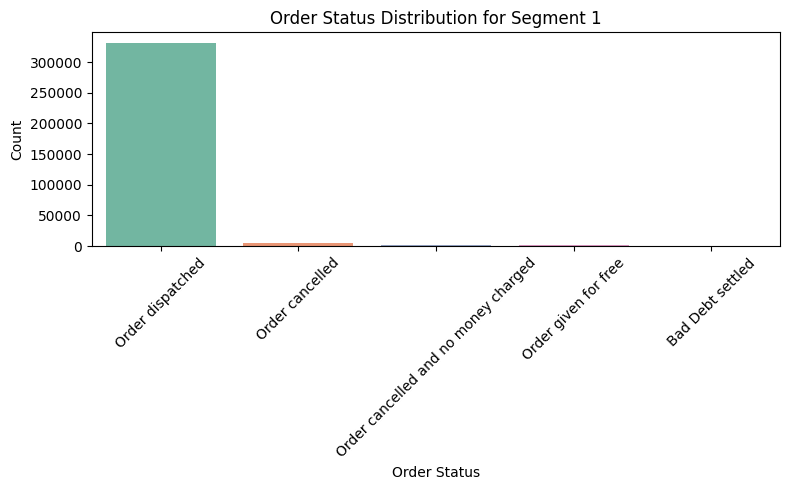

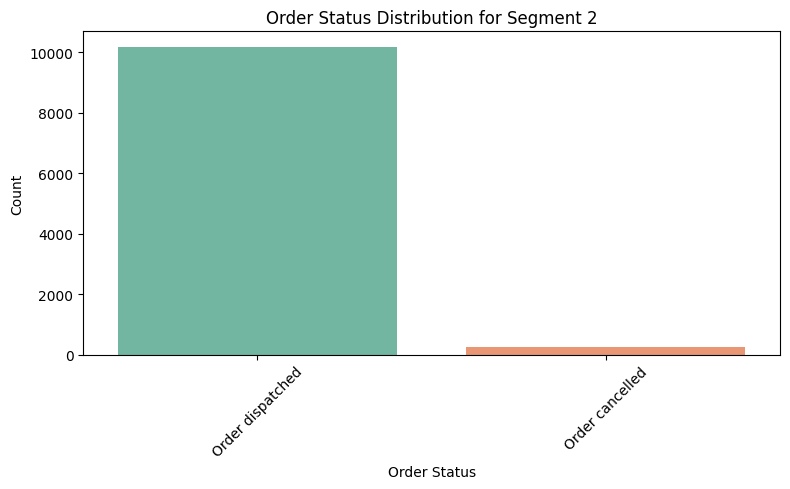

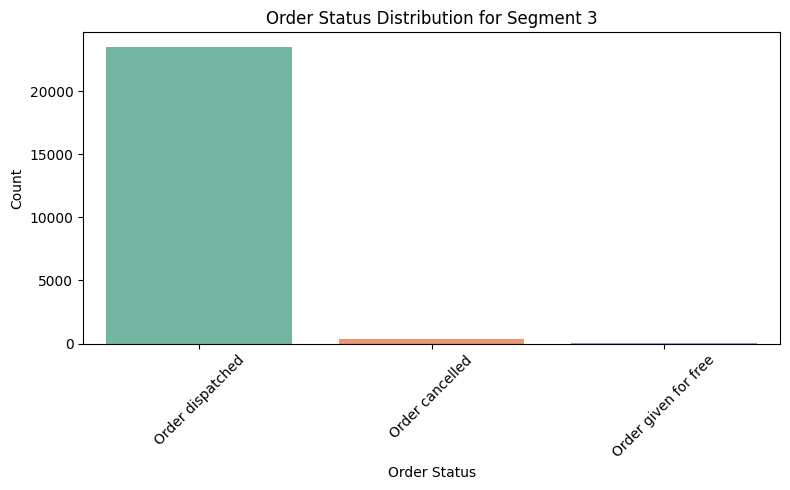

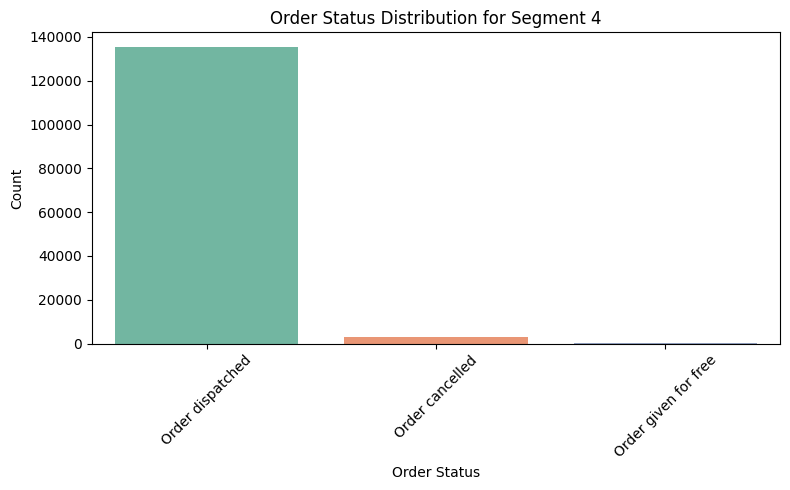

In [82]:
# Adjust these names if your DataFrame or column names are different
segment_col = 'KMeans_Segment'  # or 'KMeansSegment'
cluster_list = [0, 1, 2, 3, 4]  # Update if you have a different number of segments

for i in cluster_list:
    # Get list of customers in the current segment
    customer_list = df_segment_profiling.loc[
        df_segment_profiling[segment_col] == i, 'CustomerID'
    ].unique()
    
    # Filter the main data for these customers
    df_temp = data[data['CustomerID'].isin(customer_list)]
    
    # Plot countplot for Order_Status
    plt.figure(figsize=(8, 5))
    sns.countplot(
        x='Order_Status',
        data=df_temp,
        order=df_temp['Order_Status'].value_counts().index,
        palette='Set2'
    )
    plt.title(f'Order Status Distribution for Segment {i}')
    plt.xlabel('Order Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Order counts by month for segment 0:
  Month April: 2556 orders
  Month August: 1593 orders
  Month December: 3508 orders
  Month February: 2406 orders
  Month January: 2245 orders
  Month July: 2295 orders
  Month June: 2599 orders
  Month March: 3240 orders
  Month May: 2779 orders
  Month October: 3074 orders
  Month September: 3366 orders


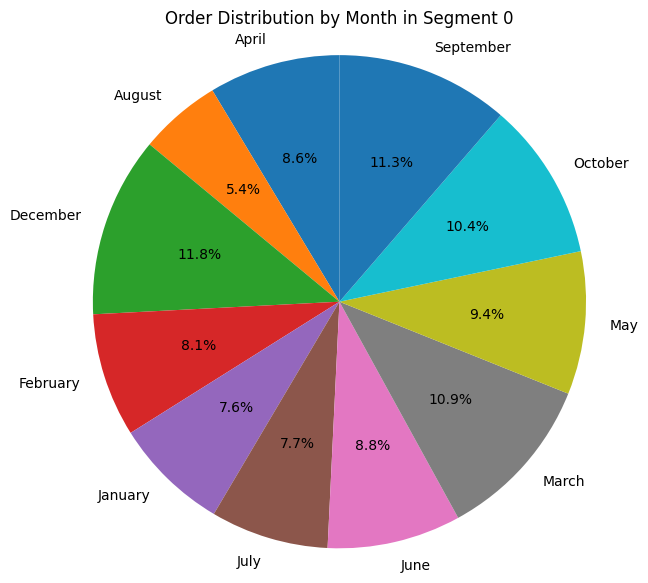

Order counts by month for segment 1:
  Month April: 16765 orders
  Month August: 20848 orders
  Month December: 51749 orders
  Month February: 16278 orders
  Month January: 23588 orders
  Month July: 25459 orders
  Month June: 22035 orders
  Month March: 20786 orders
  Month May: 22068 orders
  Month November: 56247 orders
  Month October: 33964 orders
  Month September: 29960 orders


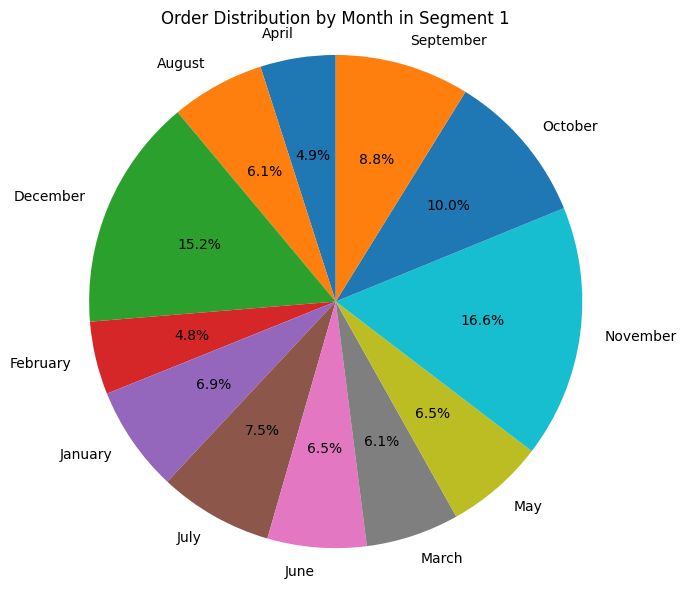

Order counts by month for segment 2:
  Month April: 934 orders
  Month August: 663 orders
  Month December: 1189 orders
  Month February: 763 orders
  Month January: 788 orders
  Month July: 802 orders
  Month June: 966 orders
  Month March: 1160 orders
  Month May: 843 orders
  Month October: 1279 orders
  Month September: 1050 orders


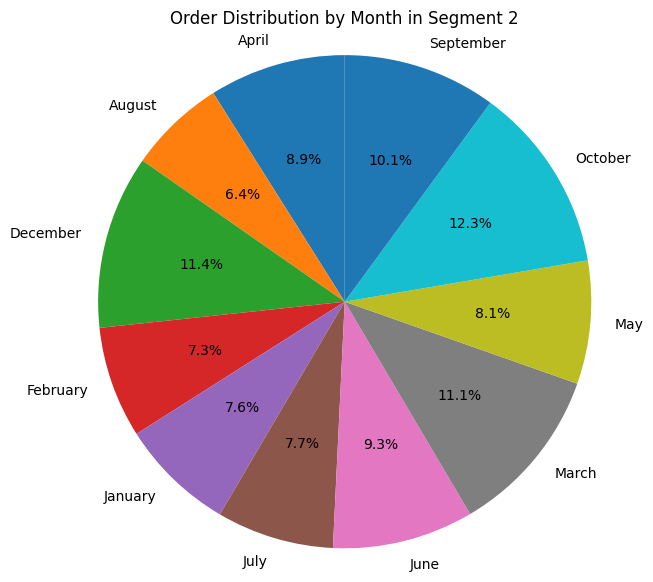

Order counts by month for segment 3:
  Month April: 494 orders
  Month August: 662 orders
  Month December: 2873 orders
  Month February: 502 orders
  Month January: 332 orders
  Month July: 571 orders
  Month June: 659 orders
  Month March: 570 orders
  Month May: 544 orders
  Month November: 11055 orders
  Month October: 4394 orders
  Month September: 1232 orders


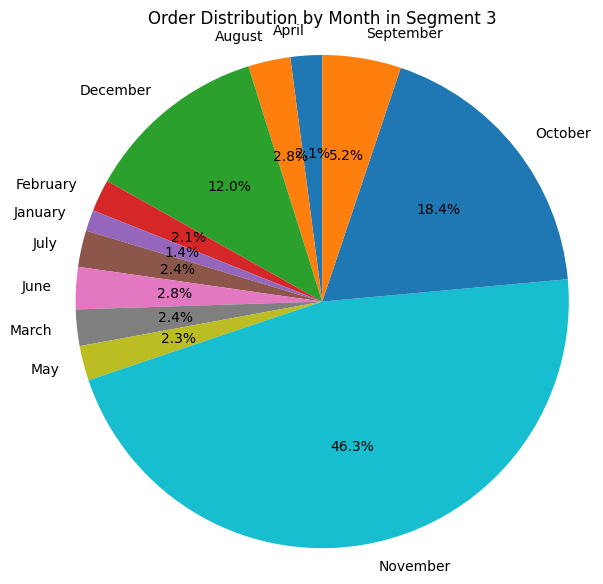

Order counts by month for segment 4:
  Month April: 9167 orders
  Month August: 11518 orders
  Month December: 8687 orders
  Month February: 7758 orders
  Month January: 8194 orders
  Month July: 10391 orders
  Month June: 10615 orders
  Month March: 10992 orders
  Month May: 10796 orders
  Month November: 17409 orders
  Month October: 18031 orders
  Month September: 14618 orders


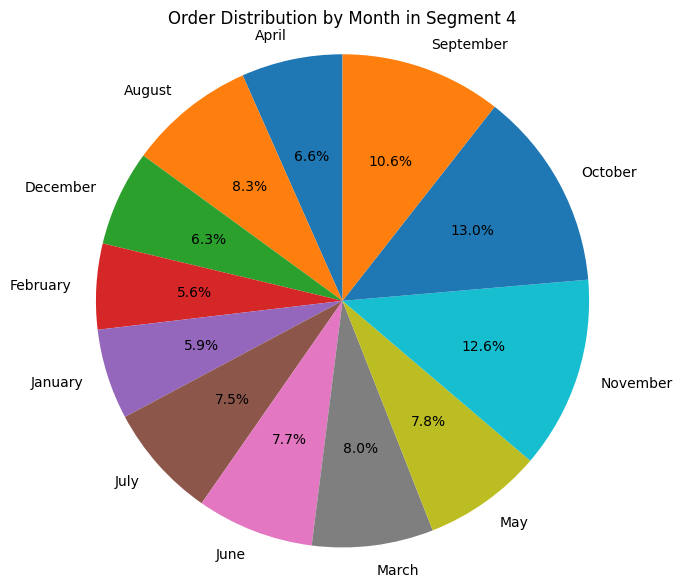

In [83]:
# Adjust if your segment column has a different name
segment_col = 'KMeans_Segment'
cluster_list = [0, 1, 2, 3, 4]  # Update if you have a different number of segments

for i in cluster_list:
    # Get unique customers in the current segment
    customer_list = df_segment_profiling.loc[
        df_segment_profiling[segment_col] == i, 'CustomerID'
    ].unique()
    
    # Filter main data for these customers
    df_temp = data[data['CustomerID'].isin(customer_list)]
    
    # Count orders by month
    month_counts = df_temp['Invoice_Month'].value_counts().sort_index()
    labels = month_counts.index.tolist()
    sizes = month_counts.values.tolist()
    
    print(f"Order counts by month for segment {i}:")
    for label, size in zip(labels, sizes):
        print(f"  Month {label}: {size} orders")
    
    # Plot pie chart
    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f"Order Distribution by Month in Segment {i}")
    plt.axis('equal')  # Ensures the pie chart is a circle
    plt.show()


### Visualisation

RFM Score of customers belonging to 0 cluster


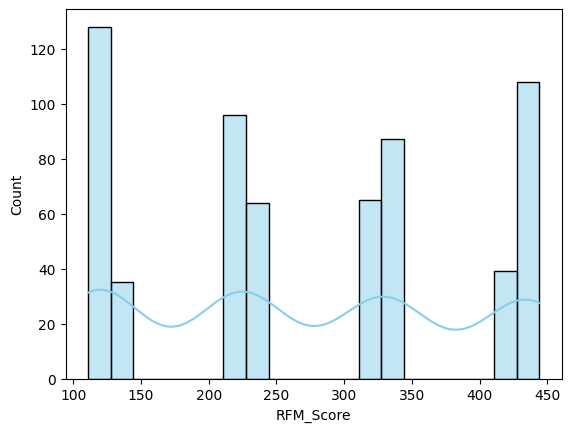

RFM Score of customers belonging to 1 cluster


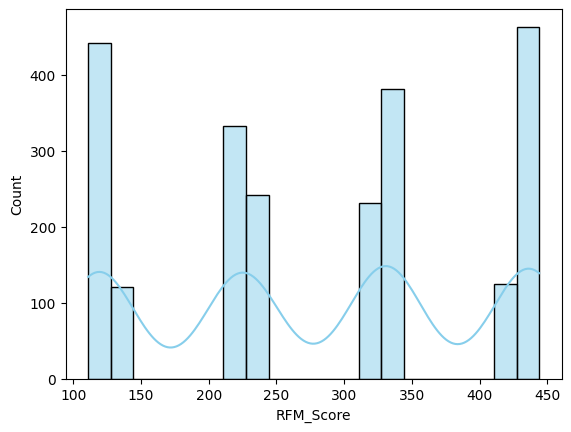

RFM Score of customers belonging to 2 cluster


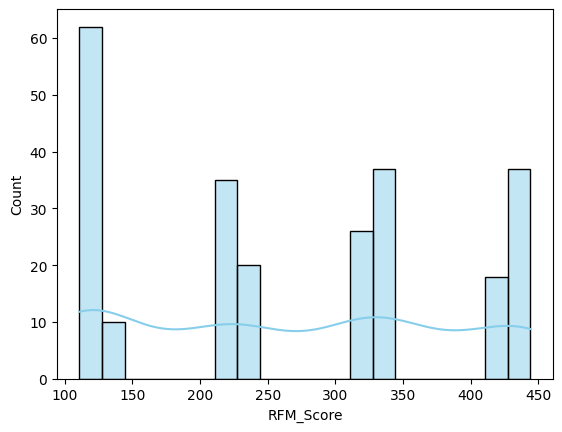

RFM Score of customers belonging to 3 cluster


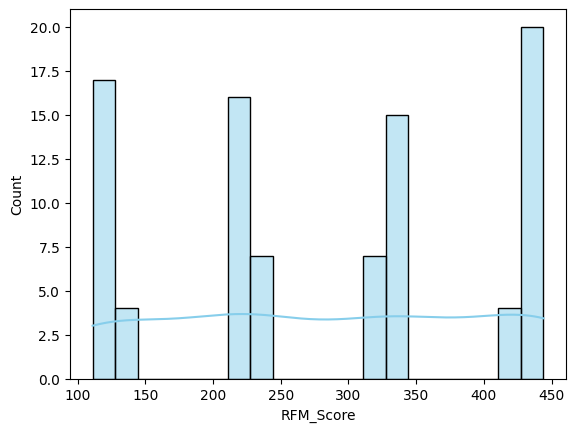

RFM Score of customers belonging to 4 cluster


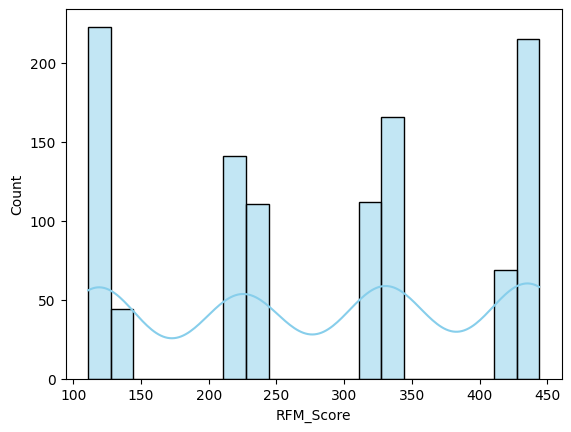

In [84]:
#distribution of rmf scores wrt customers belonging to each segment
for i in cluster_list: 
    customer_list=[]
    customer_list=df_segment_profiling['CustomerID'][df_segment_profiling['KMeans_Segment']==i].to_list()
    df_temp=scored_df[['CustomerID','RFM_Score']][data['CustomerID'].isin(customer_list)]
    print("RFM Score of customers belonging to "+ str(i)+" cluster") 
    sns.histplot(df_temp['RFM_Score'], kde=True, bins=20, color='skyblue') 
    plt.show()


### Additional Analyses

In [86]:
DF.shape

(541909, 8)

In [87]:
DF.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [88]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [89]:
#covers a time period from december 2010 to december 2011
print("Start date:", data['InvoiceDate'].min()) 
print("End date:", data['InvoiceDate'].max())

Start date: 2010-12-01 08:26:00
End date: 2011-12-09 12:50:00


In [91]:
# Customer Analysis
# 4373 unique customers 
merged_df.shape

(4373, 8)

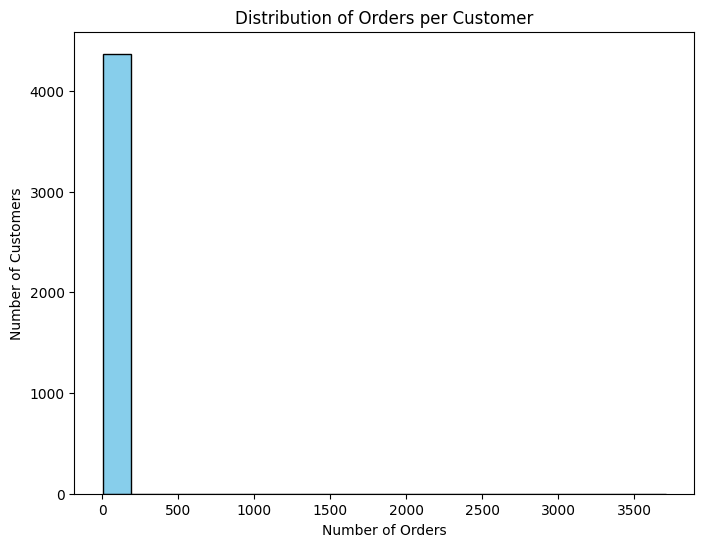

In [92]:
orders_per_customer = data.groupby('CustomerID')['InvoiceNo'].nunique()

plt.figure(figsize=(8, 6))
plt.hist(orders_per_customer, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Orders per Customer')
plt.show()

In [93]:
orders_per_customer.head()

CustomerID
12346    2
12347    7
12348    4
12349    1
12350    1
Name: InvoiceNo, dtype: int64

In [95]:
df_temp_new = df_frequency.sort_values(by='Frequency', ascending=False) 
print(df_temp_new['CustomerID'].head(5))

4372    Unavilable
4042         17841
1895         14911
1300         14096
330          12748
Name: CustomerID, dtype: object


In [96]:
data['Description'].value_counts().head(5)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: count, dtype: int64

In [97]:
data['UnitPrice'].mean()

4.611113626088513

In [98]:
#catagory generating highest revenue
df_temp_2=data.groupby(by='Description', as_index=False)['TotalCost'].sum() 
df_temp_2['Description'][df_temp_2['TotalCost']==df_temp_2['TotalCost'].max()]

2445    PAPER CRAFT , LITTLE BIRDIE
Name: Description, dtype: object

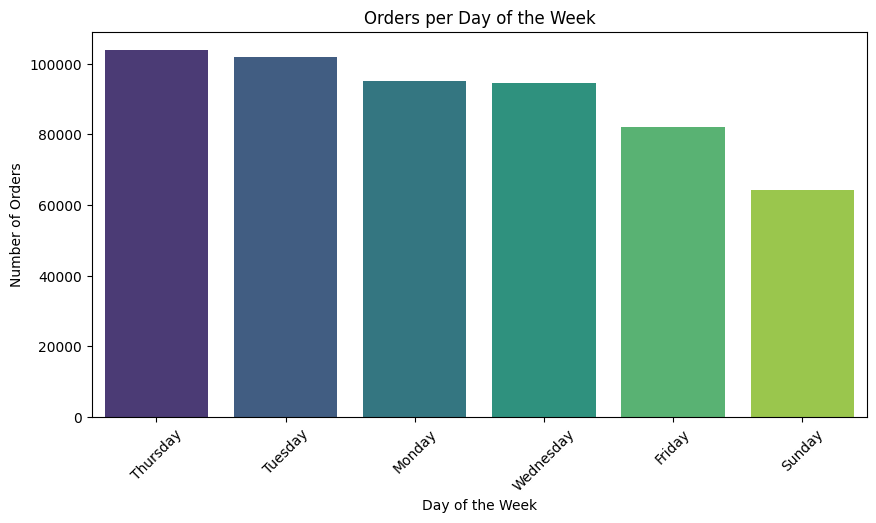

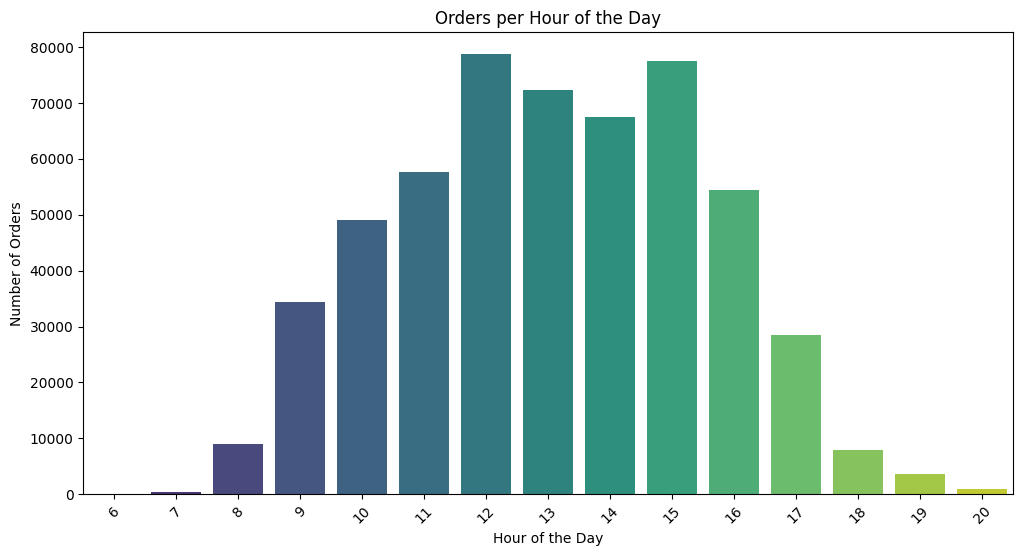

In [102]:
#graphs showing orders per day of the week and hour of the day 
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name() 
data['HourOfDay'] = data['InvoiceDate'].dt.hour

orders_per_day = data['DayOfWeek'].value_counts()

orders_per_hour = data['HourOfDay'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=orders_per_day.index, y=orders_per_day.values, palette='viridis')
plt.title('Orders per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=orders_per_hour.index, y=orders_per_hour.values, palette='viridis')
plt.title('Orders per Hour of the Day') 
plt.xlabel('Hour of the Day') 
plt.ylabel('Number of Orders') 
plt.xticks(rotation=45)
plt.show()

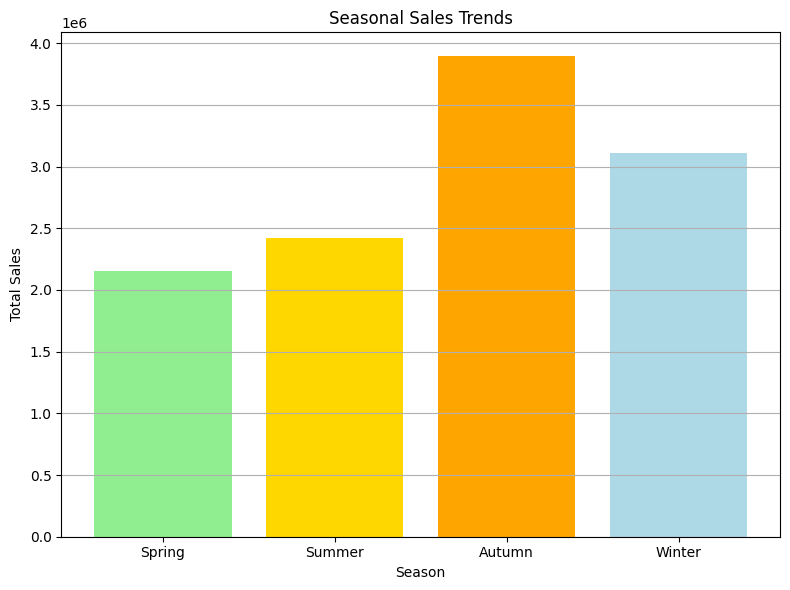

In [103]:
#observing seasonal trends
data['Month'] = data['InvoiceDate'].dt.month

seasons = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Autumn',
    10: 'Autumn', 11: 'Autumn', 12: 'Winter'
}
data['Season'] = data['Month'].map(seasons)

seasonal_sales = data.groupby('Season')['TotalCost'].sum()

plt.figure(figsize=(8, 6))
seasonal_sales = seasonal_sales.reindex(['Spring', 'Summer', 'Autumn', 'Winter']) # Reordering seasons
plt.bar(seasonal_sales.index, seasonal_sales.values, color=['lightgreen', 'gold', 'orange', 'lightblue']) 
plt.title('Seasonal Sales Trends') 
plt.xlabel('Season') 
plt.ylabel('Total Sales') 
plt.grid(axis='y') 
plt.tight_layout()
plt.show()

In [104]:
monthly_sales = data.groupby('Month')['TotalCost'].sum()
print(monthly_sales)

Month
1      822728.860
2      549201.130
3      752011.640
4      582410.121
5      817738.530
6      832356.680
7      757142.271
8      835596.250
9     1097492.722
10    1239253.930
11    1557236.410
12    1742452.610
Name: TotalCost, dtype: float64


In [105]:
top_countries = data['Country'].value_counts().head(5)
print(top_countries)

Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: count, dtype: int64


In [106]:
#no way to calculate correlation since countries are catagorical and average order value is numeric
country_order_values = data.groupby('Country')['TotalCost'].sum()

orders_per_country = data.groupby('Country')['InvoiceNo'].nunique()

average_order_value = country_order_values / orders_per_country

print(average_order_value)

Country
Australia               2028.483333
Austria                  539.107368
Bahrain                  239.970000
Belgium                  348.585882
Brazil                  1143.600000
Canada                   611.063333
Channel Islands          630.745152
Cyprus                   711.723500
Czech Republic           189.152000
Denmark                  911.549524
EIRE                     843.419722
European Community       261.750000
Finland                  474.279583
France                   481.618915
Germany                  391.436269
Greece                   801.753333
Hong Kong               1417.770667
Iceland                  615.714286
Israel                   929.188889
Italy                    328.654000
Japan                   1410.432857
Lebanon                 1693.880000
Lithuania                415.265000
Malta                    294.571000
Netherlands             2833.971683
Norway                   929.185500
Poland                   310.673333
Portugal            

### Customer Behaviour

In [107]:
#Average customer lifespan
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

customer_lifetime = data.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])
customer_lifetime['Lifetime'] = (customer_lifetime['max'] - customer_lifetime['min']).dt.days

average_lifetime = customer_lifetime['Lifetime'].mean()
print("Average customer lifetime (days):", average_lifetime)

Average customer lifetime (days): 133.44042991081636


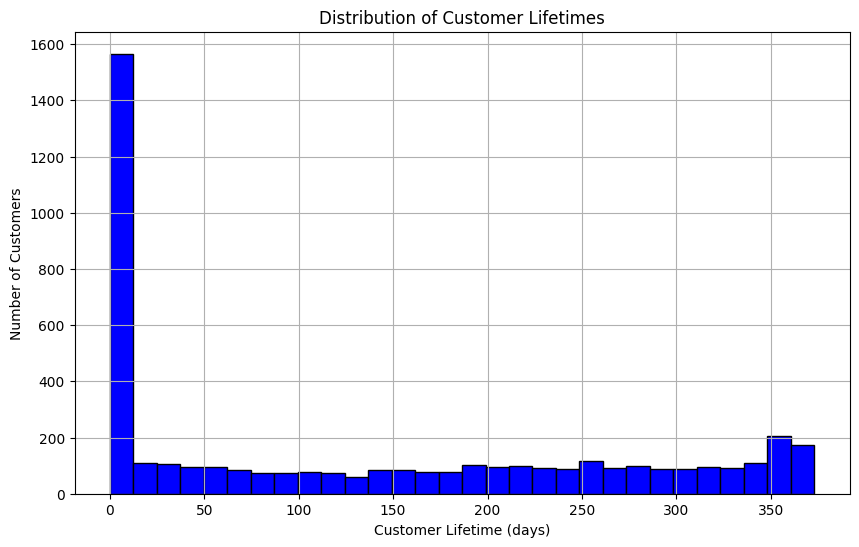

In [108]:
#plotting average customer lifelines
customer_lifetime = data.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])
customer_lifetime['Lifetime'] = (customer_lifetime['max'] - customer_lifetime['min']).dt.days
plt.figure(figsize=(10, 6))
plt.hist(customer_lifetime['Lifetime'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Customer Lifetimes') 
plt.xlabel('Customer Lifetime (days)') 
plt.ylabel('Number of Customers')
plt.grid(True) 
plt.show()

In [109]:
#Customer Segments based on purchase behavior
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
customer_data = data.groupby('CustomerID').agg({
    'InvoiceDate': 'max',
    'Quantity': 'sum',
    'UnitPrice': 'mean'
}).reset_index()

customer_data['TotalAmount'] = customer_data['Quantity'] * customer_data['UnitPrice']
features = ['TotalAmount', 'Quantity', 'UnitPrice']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[features])

kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

cluster_stats = customer_data.groupby('Cluster')[features].mean()
print(cluster_stats)

          TotalAmount       Quantity    UnitPrice
Cluster                                          
0        3.789664e+03    1068.974353     5.100706
1        1.802309e+06  127045.000000    68.088802
2        2.395296e+05      29.500000  6171.705000


In [110]:
#top 10 products which have been returned
data[data['Quantity']<0]['Description'].value_counts().head(10)

Description
Manual                               244
REGENCY CAKESTAND 3 TIER             181
POSTAGE                              126
check                                120
JAM MAKING SET WITH JARS              87
Discount                              77
SET OF 3 CAKE TINS PANTRY DESIGN      74
SAMPLES                               61
STRAWBERRY CERAMIC TRINKET BOX        55
ROSES REGENCY TEACUP AND SAUCER       54
Name: count, dtype: int64

No way to observe correlation since product catagory is a catagorical column and number of returned orders is a numeric column

### Profitability Analysis

In [112]:
data['Profit'] = data['TotalCost'] * (np.random.uniform(-0.1, 0.3, len(data)))

In [113]:
profit_total = data['Profit'].sum()
total_revenue = data['TotalCost'].sum()
print("Total Profit generated: ", profit_total)
print("Profit Percentage: ", (profit_total/total_revenue)*100)

Total Profit generated:  1114217.8415485872
Profit Percentage:  9.617247333897994


In [115]:
#Top 5 products with highest profit margins
df_product = data.groupby('Description').agg({
    'UnitPrice': 'mean',
    'TotalCost': 'sum',
    'Profit': 'sum'
}).reset_index()
df_product.columns= ['Product','Average Unit Price','Total Revenue','Total Profit']
df_product.sort_values(by='Total Profit', ascending=False, inplace=True) 
df_product.head()

,Product,Average Unit Price,Total Revenue,Total Profit
2104,MEDIUM CERAMIC TOP STORAGE JAR,1.456846,159180.56,22534.350931
1098,DOTCOM POSTAGE,290.905585,206252.06,21858.272650
2915,REGENCY CAKESTAND 3 TIER,13.800277,184207.29,18265.262040
2246,Manual,374.914266,224897.28,16534.036864
171,AMAZON FEE,7324.784706,249042.68,12726.192305


### Customer Satisfaction

In [116]:
data['Customer Satisfaction'] = np.random.randint(1, 6, len(data))

In [117]:
customer_satisfaction = data.groupby('Description')['Customer Satisfaction'].mean().reset_index()
customer_satisfaction.columns=["Product","Average Product Customer Satisfaction"]
customer_satisfaction

,Product,Average Product Customer Satisfaction
0,4 PURPLE FLOCK DINNER CANDLES,2.975610
1,50'S CHRISTMAS GIFT BAG LARGE,3.238462
2,DOLLY GIRL BEAKER,3.055249
3,I LOVE LONDON MINI BACKPACK,3.000000
4,I LOVE LONDON MINI RUCKSACK,1.000000
...,...,...
4218,wrongly marked carton 22804,4.000000
4219,wrongly marked. 23343 in box,5.000000
4220,wrongly sold (22719) barcode,4.000000
4221,wrongly sold as sets,4.000000


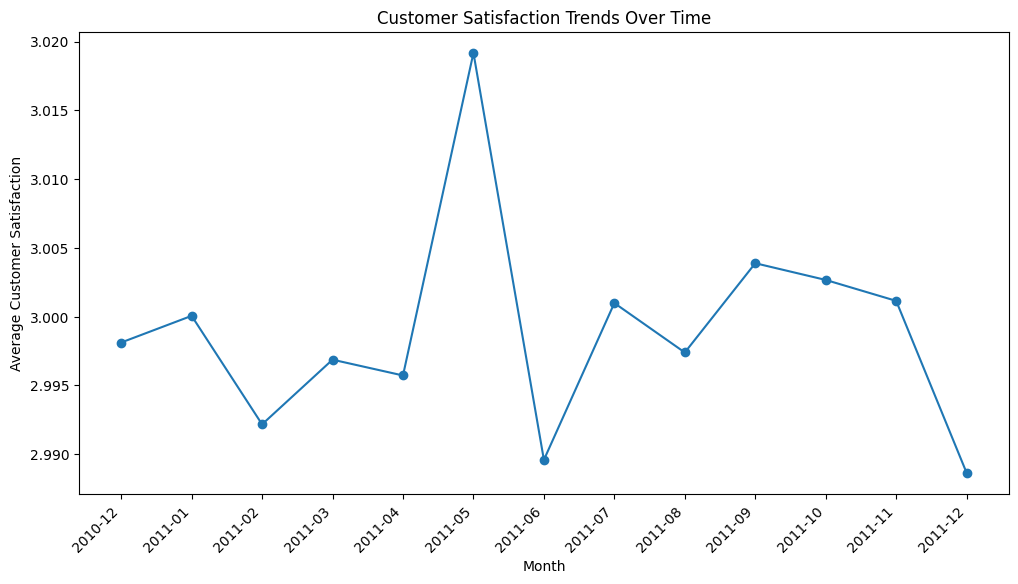

In [120]:
satisfaction_trends = data.groupby(data['InvoiceDate'].dt.to_period("M"))['Customer Satisfaction'].mean()
plt.figure(figsize=(12, 6))
plt.plot(satisfaction_trends.index.astype(str), satisfaction_trends.values, marker='o')
plt.title('Customer Satisfaction Trends Over Time') 
plt.xlabel('Month')
plt.ylabel('Average Customer Satisfaction') 
plt.xticks(rotation=45, ha='right')
plt.show()